### Testing the algorithmic complexity of computations

In [23]:
import numpy as np
import time
import tqdm
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [22]:
# Complexity functions
f_n = lambda n, a, b: a + b * n  # O(n)
f_n2 = lambda n, a, b: a + b * n**2  # O(n^2)
f_nlogn = lambda n, a, b: a + b * n * np.log10(n)  # O(nlogn)

In [2]:
np.random.seed(0)

In [17]:
val = np.random.rand(100).round(2)
def isin(x):
    return np.isin(x, val)

In [56]:
comp_func = isin
# comp_func = np.unique
# comp_func = np.sort

In [57]:
# Run benchmark
max_N = int(1e6)
step_N = int(1e3)
ntab = []
ttab = []
for n in tqdm.tqdm(range(step_N, max_N, step_N), desc=comp_func.__name__):
    n_vals = np.random.rand(n).round(2)
    t0 = time.time()

    # Call function to test:
    comp_func(n_vals)

    t = time.time() - t0
    ntab.append(n)
    ttab.append(t)

isin: 100%|██████████| 999/999 [00:56<00:00, 17.80it/s] 


In [58]:
# Fit complexity functions
pct_fit = 10  # First percentage to data to fit complexity functions
num_fit = np.round(0.1 * len(ntab)).astype(int)

fit_n = curve_fit(f_n, ntab[:num_fit], ttab[:num_fit])
fit_n2 = curve_fit(f_n2, ntab[:num_fit], ttab[:num_fit])
fit_nlogn = curve_fit(f_nlogn, ntab[:num_fit], ttab[:num_fit])

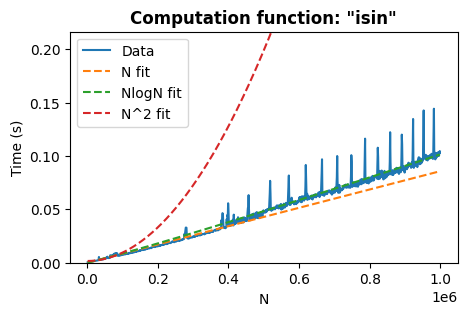

In [60]:
plt.figure(figsize=(5, 3))
plt.plot(ntab, ttab, label='Data')
plt.plot(ntab, f_n(np.array(ntab), *fit_n[0]), '--', label='N fit')
plt.plot(ntab, f_nlogn(np.array(ntab), *fit_nlogn[0]), '--', label='NlogN fit')
plt.plot(ntab, f_n2(np.array(ntab), *fit_n2[0]), '--', label='N^2 fit')
plt.ylim([0, np.max(ttab) * 1.5])
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.title(f'Computation function: "{comp_func.__name__}"', fontweight='bold')
plt.legend(loc='upper left')
plt.show()